# Code Exiobase_EU_ETS_2 by Martínez-Hernando


This information is necessary in Python, for activate the funtions 
If they are not installed is necessary to do it, write pip install XXXXX. If pip doesn't work put pip3, or pip3.11 (search on internet)

Activate generical information

In [1]:
import pandas as pd #To real CSV and dataframes
import numpy as np #To work with matrix
from scipy import io, integrate, linalg, signal #Google told me, I don´t know what is it
from scipy.sparse.linalg import cg, eigs #Google told me, I don´t know what is it

To create list

In [2]:
from typing import List, Tuple, Dict, Callable, Iterable, Union

 # To use pymrio

In [3]:
import pymrio as mr

Declare new IO system

In [4]:
exio3311=mr.IOSystem()
exio3350=mr.IOSystem()
exio3380=mr.IOSystem()
exio33100=mr.IOSystem()

## Importing EXIOBASE 3.3.18 data
We will only import:
- $Z$, the intermediate consumption,
- $Y$, the final demand,
- $F$ and $F_Y$, the environmental extensions, only for air emissions.

In [5]:
exiobase_folder="P:/Universidad/Exiobase/" #Put here your folder where you have download Exiobase with /, no with \

Z (Intermediate products)

In [6]:
Z_raw=pd.read_csv(exiobase_folder + "MR_HIOT_2011_v3_3_18_by_product_technology.csv", #You should have this name of file, if not change it
                    index_col = [0,1,2,3,4],
                    header = [0,1,2,3])
Z_raw.head() #To see the first lines

AU  \
                                               Cultivation of paddy rice   
                                                                   i01.a   
                                                                  A_PARI   
AU Paddy rice              p01.a C_PARI tonnes                       0.0   
   Wheat                   p01.b C_WHEA tonnes                       0.0   
   Cereal grains nec       p01.c C_OCER tonnes                       0.0   
   Vegetables, fruit, nuts p01.d C_FVEG tonnes                       0.0   
   Oil seeds               p01.e C_OILS tonnes                       0.0   

                                                                     \
                                               Cultivation of wheat   
                                                              i01.b   
                                                             A_WHEA   
AU Paddy rice              p01.a C_PARI tonnes                  0.0   
   Wheat                   p01.b C_WHEA tonnes                  0.0   
   Cereal grains nec       p01.c C_OCER tonnes                  0.0   
   Vegetables, fruit, nuts p01.d C_FVEG tonnes                  0.0   
   Oil seeds               p01.e C_OILS tonnes                  0.0   

                                                                                 \
                                               Cultivation of cereal grains nec   
                                                                          i01.c   
                                                                         A_OCER   
AU Paddy rice              p01.a C_PARI tonnes                          0.00000   
   Wheat                   p01.b C_WHEA tonnes                          0.00000   
   Cereal grains nec       p01.c C_OCER tonnes                      70942.96547   
   Vegetables, fruit, nuts p01.d C_FVEG tonnes                          0.00000   
   Oil seeds               p01.e C_OILS tonnes                          0.00000   

                                                                                       \
                                               Cultivation of vegetables, fruit, nuts   
                                                                                i01.d   
                                                                               A_FVEG   
AU Paddy rice              p01.a C_PARI tonnes                                0.00000   
   Wheat                   p01.b C_WHEA tonnes                                0.00000   
   Cereal grains nec       p01.c C_OCER tonnes                                0.00000   
   Vegetables, fruit, nuts p01.d C_FVEG tonnes                            18266.75262   
   Oil seeds               p01.e C_OILS tonnes                                0.00000   

                                                                         \
                                               Cultivation of oil seeds   
                                                                  i01.e   
                                                                 A_OILS   
AU Paddy rice              p01.a C_PARI tonnes                      0.0   
   Wheat                   p01.b C_WHEA tonnes                      0.0   
   Cereal grains nec       p01.c C_OCER tonnes                      0.0   
   Vegetables, fruit, nuts p01.d C_FVEG tonnes                      0.0   
   Oil seeds               p01.e C_OILS tonnes                      0.0   

                                                                                      \
                                               Cultivation of sugar cane, sugar beet   
                                                                               i01.f   
                                                                              A_SUGB   
AU Paddy rice              p01.a C_PARI tonnes                                   0.0   
   Wheat                   p01.b C_WHEA tonnes                                 

In [7]:
Z_reindexed=Z_raw.droplevel([2,3,4], axis=0).copy() #To remove useless rows
Z_reindexed.index.names=["region","sector"]
Z_reindexed.columns=Z_reindexed.index
Z_reindexed.head()


region                                 AU                          \
sector                         Paddy rice Wheat Cereal grains nec   
region sector                                                       
AU     Paddy rice                     0.0   0.0           0.00000   
       Wheat                          0.0   0.0           0.00000   
       Cereal grains nec              0.0   0.0       70942.96547   
       Vegetables, fruit, nuts        0.0   0.0           0.00000   
       Oil seeds                      0.0   0.0           0.00000   

region                                                            \
sector                         Vegetables, fruit, nuts Oil seeds   
region sector                                                      
AU     Paddy rice                              0.00000       0.0   
       Wheat                                   0.00000       0.0   
       Cereal grains nec                       0.00000       0.0   
       Vegetables, fruit, nuts             18266.75262       0.0   
       Oil seeds                               0.00000       0.0   

region                                                                    \
sector                         Sugar cane, sugar beet Plant-based fibers   
region sector                                                              
AU     Paddy rice                                 0.0               0.00   
       Wheat                                      0.0               0.00   
       Cereal grains nec                          0.0               0.00   
       Vegetables, fruit, nuts                    0.0               0.00   
       Oil seeds                                  0.0        -1206065.87   

region                                                                 ...  \
sector                         Crops nec        Cattle           Pigs  ...   
region sector                                                          ...   
AU     Paddy rice                    0.0  0.000000e+00       0.000000  ...   
       Wheat                         0.0  6.791574e+05  156083.893300  ...   
       Cereal grains nec             0.0  2.277000e+06  823314.442100  ...   
       Vegetables, fruit, nuts       0.0  1.552051e+03     255.322381  ...   
       Oil seeds                     0.0  0.000000e+00       0.000000  ...   

region                                                    WM  \
sector                         Paper for treatment: landfill   
region sector                                                  
AU     Paddy rice                                        0.0   
       Wheat                                             0.0   
       Cereal grains nec                                 0.0   
       Vegetables, fruit, nuts                           0.0   
       Oil seeds                                         0.0   

region                                                                \
sector                         Plastic waste for treatment: landfill   
region sector                                                          
AU     Paddy rice                                                0.0   
       Wheat                                                     0.0   
       Cereal grains nec                                         0.0   
       Vegetables, fruit, nuts                                   0.0   
       Oil seeds                                                 0.0   

region                                                                              \
sector                         Inert/metal/hazardous waste for treatment: landfill   
region sector                                                                        
AU     Paddy rice                                                             0.0    
       Wheat                                                                  0.0    
       Cereal grains nec                                                      0.0    
       Vegetables, fruit, nuts                                

In [8]:
exio3311.Z=Z_reindexed

Y (Final demand)

In [9]:
Y_raw = pd.read_csv(exiobase_folder + "MR_HIOT_2011_v3_3_18_FD.csv", #You should have this name of file, if not change it
                    index_col = [0,1,2,3,4],
                    header = [0,1,2,3])

Y_reindexed=Y_raw.droplevel([2,3], axis=1).copy() #To remove useless columns
Y_reindexed.index=Z_reindexed.index
Y_reindexed.columns.names=["region", "sector"] #To name the columns
exio3311.Y=Y_reindexed

X (total production)

In [10]:
X_raw = pd.read_csv(exiobase_folder + "MR_HIOT_2011_v3_3_18_principal_production.csv", #You should have this name of file, if not change it
                    header = [0,1,2,3,4,5,6,7])

X_reindexed=X_raw.droplevel([2,3,4,5,6,7], axis=1).copy()
X_reindexed.columns=exio3311.Z.columns #To rename the columns
X_reindexed.index=['Total production'] #To rename the index
exio3311.x=X_reindexed.T

F and F_Y (Extensions, total emissions per activity)

In [11]:
exio3311.emissions=mr.Extension("emissions")
F_raw = pd.read_excel(exiobase_folder + "MR_HIOT_2011_v3_3_18_extensions.xlsx", #This data is emissions of intermediate production
                      sheet_name="Emiss_act", #You should have this name of file, if not change it.
                      index_col=[0,1,2],
                      header=[0,1,2,3])
F_raw.columns=Z_reindexed.columns

F_Y_raw=pd.read_excel(exiobase_folder + "MR_HIOT_2011_v3_3_18_extensions.xlsx", #This data is emissions of final demand
                      sheet_name="Emiss_FD", #You should have this name of file, if not change it.
                      index_col=[0,1,2],
                      header=[0,1,2,3])
F_Y_raw.columns=Y_reindexed.columns

F_raw.head()
F_Y_raw.head()
exio3311.emissions.F=F_raw
exio3311.emissions.F_Y=F_Y_raw

Equilibrium in electricity mix

In [12]:
init_elec=95
finit_elec=init_elec+11
exio3311.Z.iloc[finit_elec,:]
for i in range (48):
    init_elec_i=init_elec+i*164
    finit_elec_i=finit_elec+i*164
    total_electricity_i=exio3311.x.iloc[init_elec_i:finit_elec_i,:]
    total_elec_sum=total_electricity_i.sum()
    perc_elect_i=total_electricity_i/total_elec_sum
    for j in range(len(exio3311.Z.columns)):
        elec_j=exio3311.Z.iloc[init_elec_i:finit_elec_i,j]
        elec_j_sum=elec_j.sum()
        new_elec_j=elec_j_sum*perc_elect_i
        exio3311.Z.iloc[init_elec_i:finit_elec_i,j]=new_elec_j


# Updating the electricity mix to 2030

Vector of variation of electricity mix (lambda). Most numbers are ones because they are not electricity mix

In [13]:
vector_lambda=pd.read_csv(exiobase_folder + "MR_2030_lambda_PNIEC_IEA.csv", #You should have this name of file, if not change it
                    index_col = [0,1],
                    header = [0])
vector_lambda.index=exio3311.Z.index
vector_lambda=vector_lambda.squeeze()
vector_lambda

region  sector                                           
AU      Paddy rice                                           1.0
        Wheat                                                1.0
        Cereal grains nec                                    1.0
        Vegetables, fruit, nuts                              1.0
        Oil seeds                                            1.0
                                                            ... 
WM      Membership organisation services n.e.c. (91)         1.0
        Recreational, cultural and sporting services (92)    1.0
        Other services (93)                                  1.0
        Private households with employed persons (95)        1.0
        Extra-territorial organizations and bodies           1.0
Name: Value, Length: 7872, dtype: float64

Creation of new Z that multiplies columns and raws by lambda

In [14]:
Z_100=exio3311.Z.mul(vector_lambda, axis=0)
Z_100=Z_100.mul(vector_lambda, axis=1)

Comprobation

In [15]:
print(exio3311.Z.loc[('ES','Electricity by coal'),('ES','Bottles for treatment, Recycling of bottles by direct reuse')])
print(vector_lambda.loc[('ES','Electricity by coal')])
Z_100.loc[('ES','Electricity by coal'),('ES','Bottles for treatment, Recycling of bottles by direct reuse')]


28.77233375922825
0.0


0.0

Z modified to update activities which in 2011 has no production of one type of electricity and in 2022 they have. It has been done using the proportion of rows and columns of the region where country is or a near country

In [16]:
Z_gamma=pd.read_csv(exiobase_folder + "MR_HIOT_2011_v3_3_18_Z_gamma.csv", #You should have this name of file, if not change it
                    index_col = [0,1],
                    header = [0,1])
Z_gamma.index=exio3311.Z.index
Z_gamma.columns=exio3311.Z.columns
Z_gamma #To see the first lines

region                                                           AU        \
sector                                                   Paddy rice Wheat   
region sector                                                               
AU     Paddy rice                                                 0     0   
       Wheat                                                      0     0   
       Cereal grains nec                                          0     0   
       Vegetables, fruit, nuts                                    0     0   
       Oil seeds                                                  0     0   
...                                                             ...   ...   
WM     Membership organisation services n.e.c. (91)               0     0   
       Recreational, cultural and sporting services (92)          0     0   
       Other services (93)                                        0     0   
       Private households with employed persons (95)              0     0   
       Extra-territorial organizations and bodies                 0     0   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AU     Paddy rice                                                        0   
       Wheat                                                             0   
       Cereal grains nec                                                 0   
       Vegetables, fruit, nuts                                           0   
       Oil seeds                                                         0   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)                      0   
       Recreational, cultural and sporting services (92)                 0   
       Other services (93)                                               0   
       Private households with employed persons (95)                     0   
       Extra-territorial organizations and bodies                        0   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AU     Paddy rice                                                              0   
       Wheat                                                                   0   
       Cereal grains nec                                                       0   
       Vegetables, fruit, nuts                                                 0   
       Oil seeds                                                               0   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                            0   
       Recreational, cultural and sporting services (92)                       0   
       Other services (93)                                                     0   
       Private households with employed persons (95)                           0   
       Extra-territorial organizations and bodies                              0   

region                                                              \
sector                                                   Oil seeds   
region sector                                                        
AU     Paddy rice                                                0   
       Wheat                                                     0   
       Cereal grains nec                                         0   
       Vegetables, fruit, nuts                                   0   
       Oil seeds                                                 0   
...                                                            ...   
WM     Membership org

In [17]:
Z_gamma.isna().values.any() #To check all data is ok, is have to be false

False

In [18]:
Z_new=Z_100+Z_gamma
Z_new

region                                                           AU            \
sector                                                   Paddy rice     Wheat   
region sector                                                                   
AU     Paddy rice                                          0.000000  0.000000   
       Wheat                                               0.000000  0.000000   
       Cereal grains nec                                   0.000000  0.000000   
       Vegetables, fruit, nuts                             0.000000  0.000000   
       Oil seeds                                           0.000000  0.000000   
...                                                             ...       ...   
WM     Membership organisation services n.e.c. (91)        0.000351  0.001041   
       Recreational, cultural and sporting services (92)   0.000000  0.000148   
       Other services (93)                                 0.000060  0.000216   
       Private households with employed persons (95)       0.000000  0.000000   
       Extra-territorial organizations and bodies          0.000000  0.000000   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AU     Paddy rice                                                 0.000000   
       Wheat                                                      0.000000   
       Cereal grains nec                                      70942.965470   
       Vegetables, fruit, nuts                                    0.000000   
       Oil seeds                                                  0.000000   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)               0.001017   
       Recreational, cultural and sporting services (92)          0.000236   
       Other services (93)                                        0.000583   
       Private households with employed persons (95)              0.000000   
       Extra-territorial organizations and bodies                 0.000000   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AU     Paddy rice                                                       0.000000   
       Wheat                                                            0.000000   
       Cereal grains nec                                                0.000000   
       Vegetables, fruit, nuts                                      18266.752620   
       Oil seeds                                                        0.000000   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                     0.003093   
       Recreational, cultural and sporting services (92)                0.006582   
       Other services (93)                                              0.000521   
       Private households with employed persons (95)                    0.000000   
       Extra-territorial organizations and bodies                       0.000000   

region                                                              \
sector                                                   Oil seeds   
region sector                                                        
AU     Paddy rice                                         0.000000   
       Wheat                                              0.000000   
       Cereal grains nec                                  0.000000   
       Vegetables, fruit, nuts                            0.000000   
       Oil seeds                                          0.000000   
...                                

New value of Z, do not run if you will edit cells below

In [19]:
exio33100.Z=Z_new
exio33100.Z
exio33100.Z.isna().values.any() #To check all data is ok, it has to be false

False

New Y

In [20]:
Y_new=exio3311.Y.mul(vector_lambda, axis=0)
Y_new.isna().values.any() #To check all data is ok, it has to be false

False

Comprobation

In [21]:
print(exio3311.Y.loc[('ES','Electricity by coal'),('ES','Final consumption expenditure by households')])
print(vector_lambda.loc[('ES','Electricity by coal')])
Y_new.loc[('ES','Electricity by coal'),('ES','Final consumption expenditure by households')]

64568.05815
0.0


0.0

In [22]:
exio33100.Y=Y_new

Updating emissions

In [23]:
exio33100.emissions=mr.Extension("emissions")
exio33100.emissions.F=F_raw.mul(vector_lambda, axis=1)
exio33100.emissions.F_Y=F_Y_raw.mul(vector_lambda, axis=1)

In [24]:
exio33100.emissions.F

region                                           AU                \
sector                                   Paddy rice         Wheat   
Carbon dioxide, fossil   tonnes air    37614.130823  1.941735e+06   
N2O                      tonnes air       44.091107  9.484771e+03   
CH4                      tonnes air    26527.287506  1.636370e+02   
HFCs                     tonnes air        0.000000  0.000000e+00   
PFCs                     tonnes air        0.000000  0.000000e+00   
...                                             ...           ...   
Ni                       tonnes soil       0.000000  0.000000e+00   
C                        tonnes air        0.000000  0.000000e+00   
other emissions          tonnes undef    441.223279  3.708035e+04   
Carbon dioxide, biogenic tonnes air       95.600973  5.275417e+03   
Other emissions nec      tonnes air        0.000000  0.000000e+00   

region                                                   \
sector                                Cereal grains nec   
Carbon dioxide, fossil   tonnes air       490900.537062   
N2O                      tonnes air         3883.981264   
CH4                      tonnes air          137.839621   
HFCs                     tonnes air            0.000000   
PFCs                     tonnes air            0.000000   
...                                                 ...   
Ni                       tonnes soil           0.000000   
C                        tonnes air            0.000000   
other emissions          tonnes undef      35399.145759   
Carbon dioxide, biogenic tonnes air         1213.379428   
Other emissions nec      tonnes air            0.000000   

region                                                                       \
sector                                Vegetables, fruit, nuts     Oil seeds   
Carbon dioxide, fossil   tonnes air             245169.420806  83062.646179   
N2O                      tonnes air               8398.948592    463.542942   
CH4                      tonnes air                 66.855406     20.566199   
HFCs                     tonnes air                  0.000000      0.000000   
PFCs                     tonnes air                  0.000000      0.000000   
...                                                       ...           ...   
Ni                       tonnes soil                 0.000000      0.000000   
C                        tonnes air                  0.000000      0.000000   
other emissions          tonnes undef            60146.634050  37651.268801   
Carbon dioxide, biogenic tonnes air                566.437671    186.505849   
Other emissions nec      tonnes air                  0.000000      0.000000   

region                                                        \
sector                                Sugar cane, sugar beet   
Carbon dioxide, fossil   tonnes air            173071.251514   
N2O                      tonnes air              1161.180932   
CH4                      tonnes air                22.100891   
HFCs                     tonnes air                 0.000000   
PFCs                     tonnes air                 0.000000   
...                                                      ...   
Ni                       tonnes soil                0.000000   
C                        tonnes air                 0.000000   
other emissions          tonnes undef            3348.404272   
Carbon dioxide, biogenic tonnes air               217.369557   
Other emissions nec      tonnes air                 0.000000   

region                                                                 \
sector                                Plant-based fibers    Crops nec   
Carbon dioxide, fossil   tonnes air        151751.515526  4103.943658   
N2O                      tonnes air          1166.262681     2.362630   
CH4                      tonnes air            12.581706     0.422404   
HFCs                     tonnes air             0.000000     0.000000   
PFCs                     tonnes air

In [25]:
exio33100.reset_all_full() #reset
exio33100.calc_all() #calculation of the rest of matrix again

c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:984: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_cba.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:993: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_pba.groupby(lev

# Updating electricity mix to 2030 50% targets

Vector of variation of electricity mix (lambda). Most numbers are ones because they are not electricity mix

In [27]:
vector_lambda_50=pd.read_csv(exiobase_folder + "MR_2030_lambda_PNIEC_IEA_50.csv", #You should have this name of file, if not change it
                    index_col = [0,1],
                    header = [0])
vector_lambda_50.index=exio3311.Z.index
vector_lambda_50=vector_lambda_50.squeeze()
vector_lambda_50

region  sector                                           
AU      Paddy rice                                           1.0
        Wheat                                                1.0
        Cereal grains nec                                    1.0
        Vegetables, fruit, nuts                              1.0
        Oil seeds                                            1.0
                                                            ... 
WM      Membership organisation services n.e.c. (91)         1.0
        Recreational, cultural and sporting services (92)    1.0
        Other services (93)                                  1.0
        Private households with employed persons (95)        1.0
        Extra-territorial organizations and bodies           1.0
Name: Value, Length: 7872, dtype: float64

Creation of new Z that multiplies columns and raws by lambda

In [28]:
Z_50=exio3311.Z.mul(vector_lambda_50, axis=0)
Z_50=Z_50.mul(vector_lambda_50, axis=1)

In [29]:
Z_new_50=Z_50+Z_gamma

New value of Z, do not run if you will edit cells below

In [30]:
exio3350.Z=Z_new_50
exio3350.Z.isna().values.any() #To check all data is ok, it has to be false

False

In [32]:
print(exio3311.Z.loc[('PL','Electricity by coal'),('PL','Copper products')])
print(vector_lambda_50.loc[('ES','Electricity by coal')])
Z_new_50.loc[('PL','Electricity by coal'),('PL','Copper products')]

805.5152157144722
0.0


431.326161129111

New Y

In [33]:
Y_new_50=exio3311.Y.mul(vector_lambda_50, axis=0)
Y_new_50.isna().values.any() #To check all data is ok, it has to be false

False

In [34]:
print(exio3311.Y.loc[('ES','Electricity by coal'),('ES','Final consumption expenditure by households')])
print(vector_lambda_50.loc[('ES','Electricity by coal')])
Y_new_50.loc[('ES','Electricity by coal'),('ES','Final consumption expenditure by households')]

64568.05815
0.0


0.0

In [35]:
exio3350.Y=Y_new_50

Adding emissions to new system

In [36]:
exio3350.emissions=mr.Extension("emissions")
exio3350.emissions.F=F_raw.mul(vector_lambda_50, axis=1)
exio3350.emissions.F_Y=F_Y_raw.mul(vector_lambda_50, axis=1)

Calculations for 2030 50%

In [37]:
exio3350.reset_all_full() #reset
exio3350.calc_all() #calculation of the rest of matrix again

c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:984: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_cba.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:993: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_pba.groupby(lev

# Updating electricity mix to 2030 80% targets

In [40]:
vector_lambda_80=pd.read_csv(exiobase_folder + "MR_2030_lambda_PNIEC_IEA_80.csv", #You should have this name of file, if not change it
                    index_col = [0,1],
                    header = [0])
vector_lambda_80.index=exio3311.Z.index
vector_lambda_80=vector_lambda_80.squeeze()
vector_lambda_80

region  sector                                           
AU      Paddy rice                                           1.0
        Wheat                                                1.0
        Cereal grains nec                                    1.0
        Vegetables, fruit, nuts                              1.0
        Oil seeds                                            1.0
                                                            ... 
WM      Membership organisation services n.e.c. (91)         1.0
        Recreational, cultural and sporting services (92)    1.0
        Other services (93)                                  1.0
        Private households with employed persons (95)        1.0
        Extra-territorial organizations and bodies           1.0
Name: Value, Length: 7872, dtype: float64

In [41]:
Z_80=exio3311.Z.mul(vector_lambda_80, axis=0)
Z_80=Z_80.mul(vector_lambda_80, axis=1)

In [42]:
Z_new_80=Z_80+Z_gamma

In [43]:
exio3380.Z=Z_new_80
exio3380.Z.isna().values.any() #To check all data is ok, it has to be false

False

In [44]:
Y_new_80=exio3311.Y.mul(vector_lambda_80, axis=0)
Y_new_80.isna().values.any() #To check all data is ok, it has to be false

False

In [45]:
exio3380.Y=Y_new_80

In [46]:
exio3380.emissions=mr.Extension("emissions")
exio3380.emissions.F=F_raw.mul(vector_lambda_80, axis=1)
exio3380.emissions.F_Y=F_Y_raw.mul(vector_lambda_80, axis=1)

In [47]:
exio3380.reset_all_full() #reset
exio3380.calc_all() #calculation of the rest of matrix again

c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:984: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_cba.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\io_bw25\Lib\site-packages\pymrio\core\mriosystem.py:993: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_pba.groupby(lev

# Supply chains

To no change everything
11= 100%
22= 50%
30= 80%

Chain 1 CN

In [48]:
country_metal_1=input('Which country is doing metallurgy in chain 1? ISO-2 code')
mining='Copper ores and concentrates'
metal='Copper products'

impact_metal_1t11=exio33100.emissions.S*exio33100.L.loc[:,(country_metal_1,metal)]
impact_metal_1t11=impact_metal_1t11.T

impact_mining_111=impact_metal_1t11.copy()
impact_mining_111.loc[impact_mining_111.index.get_level_values("sector") != mining, :] = 0
impact_metal_111=impact_metal_1t11.copy()
impact_metal_111.loc[impact_metal_111.index.get_level_values("sector") == mining, :] = 0

impact_metal_1t=exio3350.emissions.S*exio3350.L.loc[:,(country_metal_1,metal)]
impact_metal_1t=impact_metal_1t.T

impact_mining_1=impact_metal_1t.copy()
impact_mining_1.loc[impact_mining_1.index.get_level_values("sector") != mining, :] = 0
impact_metal_1=impact_metal_1t.copy()
impact_metal_1.loc[impact_metal_1.index.get_level_values("sector") == mining, :] = 0

impact_metal_1t30=exio3380.emissions.S*exio3380.L.loc[:,(country_metal_1,metal)]
impact_metal_1t30=impact_metal_1t30.T

impact_mining_130=impact_metal_1t30.copy()
impact_mining_130.loc[impact_mining_130.index.get_level_values("sector") != mining, :] = 0
impact_metal_130=impact_metal_1t30.copy()
impact_metal_130.loc[impact_metal_130.index.get_level_values("sector") == mining, :] = 0

In [49]:
impact_mining_boats_111=impact_mining_111.copy()
impact_mining_boats_111.values[:] = 0
impact_mining_trucks_111=impact_mining_111.copy()
impact_mining_trucks_111.values[:]= 0
for row_i, row in impact_mining_1.iterrows():
    i=row_i[0] # Get the region from the row index
    if impact_mining_111.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio33100.emissions.S*exio33100.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_111.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_111.loc[(i,mining),:]
        impact_mining_trucks_111.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_111.loc[(i,mining),:]

In [50]:
impact_mining_boats_1=impact_mining_1.copy()
impact_mining_boats_1.values[:] = 0
impact_mining_trucks_1=impact_mining_1.copy()
impact_mining_trucks_1.values[:]= 0
for row_i, row in impact_mining_1.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_1.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio3350.emissions.S*exio3350.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_1.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_1.loc[(i,mining),:]
        impact_mining_trucks_1.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_1.loc[(i,mining),:]

In [51]:
impact_mining_boats_130=impact_mining_130.copy()
impact_mining_boats_130.values[:] = 0
impact_mining_trucks_130=impact_mining_130.copy()
impact_mining_trucks_130.values[:]= 0
for row_i, row in impact_mining_130.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_130.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio3380.emissions.S*exio3380.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_130.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_130.loc[(i,mining),:]
        impact_mining_trucks_130.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_130.loc[(i,mining),:]

In [52]:
impact_metal_1t11.to_csv(f'{country_metal_1}_{metal}_11.txt', sep='\t', index=True, header=True)
impact_metal_1t.to_csv(f'{country_metal_1}_{metal}.txt', sep='\t', index=True, header=True)
impact_metal_1t30.to_csv(f'{country_metal_1}_{metal}_30.txt', sep='\t', index=True, header=True)

Chain 2 DE

In [53]:
country_metal_2=input('Which country is doing metallurgy in chain 2? ISO-2 code')
mining='Copper ores and concentrates'
metal='Copper products'

impact_metal_2t11=exio33100.emissions.S*exio33100.L.loc[:,(country_metal_2,metal)]
impact_metal_2t11=impact_metal_2t11.T

impact_mining_211=impact_metal_2t11.copy()
impact_mining_211.loc[impact_mining_211.index.get_level_values("sector")!=mining,:]=0
impact_metal_211=impact_metal_2t11.copy()
impact_metal_211.loc[impact_metal_211.index.get_level_values("sector")==mining,:]=0

impact_metal_2t=exio3350.emissions.S*exio3350.L.loc[:,(country_metal_2,metal)]
impact_metal_2t=impact_metal_2t.T

impact_mining_2=impact_metal_2t.copy()
impact_mining_2.loc[impact_mining_2.index.get_level_values("sector") != mining, :] = 0
impact_metal_2=impact_metal_2t.copy()
impact_metal_2.loc[impact_metal_2.index.get_level_values("sector") == mining, :] = 0

impact_metal_2t30=exio3380.emissions.S*exio3380.L.loc[:,(country_metal_2,metal)]
impact_metal_2t30=impact_metal_2t30.T

impact_mining_230=impact_metal_2t30.copy()
impact_mining_230.loc[impact_mining_230.index.get_level_values("sector") != mining, :] = 0
impact_metal_230=impact_metal_2t30.copy()
impact_metal_230.loc[impact_metal_230.index.get_level_values("sector") == mining, :] = 0

In [54]:
impact_mining_boats_211=impact_mining_211.copy()
impact_mining_boats_211.values[:]=0
impact_mining_trucks_211=impact_mining_211.copy()
impact_mining_trucks_211.values[:]=0
for row_i,row in impact_mining_2.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_211.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio33100.emissions.S*exio33100.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services",level="sector",axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services",level="sector",axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_211.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_211.loc[(i,mining),:]
        impact_mining_trucks_211.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_211.loc[(i,mining),:]


In [55]:
impact_mining_boats_2=impact_mining_2.copy()
impact_mining_boats_2.values[:] = 0
impact_mining_trucks_2=impact_mining_2.copy()
impact_mining_trucks_2.values[:]= 0
for row_i, row in impact_mining_2.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_2.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio3350.emissions.S*exio3350.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_2.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_2.loc[(i,mining),:]
        impact_mining_trucks_2.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_2.loc[(i,mining),:]

In [56]:
impact_mining_boats_230=impact_mining_230.copy()
impact_mining_boats_230.values[:] = 0
impact_mining_trucks_230=impact_mining_230.copy()
impact_mining_trucks_230.values[:]= 0
for row_i, row in impact_mining_230.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_230.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio3380.emissions.S*exio3380.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_230.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_230.loc[(i,mining),:]
        impact_mining_trucks_230.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_230.loc[(i,mining),:]

In [57]:
impact_metal_2t11.to_csv(f'{country_metal_2}_{metal}_11.txt', sep='\t', index=True, header=True)
impact_metal_2t.to_csv(f'{country_metal_2}_{metal}.txt', sep='\t', index=True, header=True)
impact_metal_2t30.to_csv(f'{country_metal_2}_{metal}_30.txt', sep='\t', index=True, header=True)

Chain 3: ES

In [58]:
country_metal_3=input('Which country is doing metallurgy in chain 3? ISO-2 code')
mining='Copper ores and concentrates'
metal='Copper products'

impact_metal_3t11=exio33100.emissions.S*exio33100.L.loc[:,(country_metal_3,metal)]
impact_metal_3t11=impact_metal_3t11.T

impact_mining_311=impact_metal_3t11.copy()
impact_mining_311.loc[impact_mining_311.index.get_level_values("sector")!=mining,:]=0
impact_metal_311=impact_metal_3t11.copy()
impact_metal_311.loc[impact_metal_311.index.get_level_values("sector")==mining,:]=0

impact_metal_3t=exio3350.emissions.S*exio3350.L.loc[:,(country_metal_3,metal)]
impact_metal_3t=impact_metal_3t.T

impact_mining_3=impact_metal_3t.copy()
impact_mining_3.loc[impact_mining_3.index.get_level_values("sector") != mining, :] = 0
impact_metal_3=impact_metal_3t.copy()
impact_metal_3.loc[impact_metal_3.index.get_level_values("sector") == mining, :] = 0

impact_metal_3t30=exio3380.emissions.S*exio3380.L.loc[:,(country_metal_3,metal)]
impact_metal_3t30=impact_metal_3t30.T

impact_mining_330=impact_metal_3t30.copy()
impact_mining_330.loc[impact_mining_330.index.get_level_values("sector") != mining, :] = 0
impact_metal_330=impact_metal_3t30.copy()
impact_metal_330.loc[impact_metal_330.index.get_level_values("sector") == mining, :] = 0

In [59]:
impact_metal_311=impact_metal_3t11.copy()
impact_metal_311.loc[impact_metal_311.index.get_level_values("sector")==mining,:]=0
impact_mining_boats_311=impact_mining_311.copy()
impact_mining_boats_311.values[:]=0
impact_mining_trucks_311=impact_mining_311.copy()
impact_mining_trucks_311.values[:]=0
for row_i,row in impact_mining_3.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_311.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio33100.emissions.S*exio33100.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services",level="sector",axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services",level="sector",axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_311.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_311.loc[(i,mining),:]
        impact_mining_trucks_311.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_311.loc[(i,mining),:]

In [60]:
impact_mining_boats_3=impact_mining_3.copy()
impact_mining_boats_3.values[:] = 0
impact_mining_trucks_3=impact_mining_3.copy()
impact_mining_trucks_3.values[:]= 0
for row_i, row in impact_mining_3.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_3.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio3350.emissions.S*exio3350.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_3.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_3.loc[(i,mining),:]
        impact_mining_trucks_3.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_3.loc[(i,mining),:]

In [61]:
impact_mining_boats_330=impact_mining_330.copy()
impact_mining_boats_330.values[:] = 0
impact_mining_trucks_330=impact_mining_330.copy()
impact_mining_trucks_330.values[:]= 0
for row_i, row in impact_mining_330.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_330.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio3380.emissions.S*exio3380.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services", level="sector", axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_330.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_330.loc[(i,mining),:]
        impact_mining_trucks_330.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_330.loc[(i,mining),:]

In [62]:
impact_metal_3t11.to_csv(f'{country_metal_3}_{metal}_11.txt', sep='\t', index=True, header=True)
impact_metal_3t.to_csv(f'{country_metal_3}_{metal}.txt', sep='\t', index=True, header=True)
impact_metal_3t30.to_csv(f'{country_metal_3}_{metal}_30.txt', sep='\t', index=True, header=True)

Chain 4 PL

In [63]:
country_metal_4=input('Which country is doing metallurgy in chain 4? ISO-2 code')
mining='Copper ores and concentrates'
metal='Copper products'

impact_metal_4t11=exio33100.emissions.S*exio33100.L.loc[:,(country_metal_4,metal)]
impact_metal_4t11=impact_metal_4t11.T

impact_mining_411=impact_metal_4t11.copy()
impact_mining_411.loc[impact_mining_411.index.get_level_values("sector")!=mining,:]=0
impact_metal_411=impact_metal_4t11.copy()
impact_metal_411.loc[impact_metal_411.index.get_level_values("sector")==mining,:]=0

impact_metal_4t=exio3350.emissions.S*exio3350.L.loc[:,(country_metal_4,metal)]
impact_metal_4t=impact_metal_4t.T

impact_mining_4=impact_metal_4t.copy()
impact_mining_4.loc[impact_mining_4.index.get_level_values("sector")!=mining,:]=0
impact_metal_4=impact_metal_4t.copy()
impact_metal_4.loc[impact_metal_4.index.get_level_values("sector")==mining,:]=0

impact_metal_4t30=exio3380.emissions.S*exio3380.L.loc[:,(country_metal_4,metal)]
impact_metal_4t30=impact_metal_4t30.T

impact_mining_430=impact_metal_4t30.copy()
impact_mining_430.loc[impact_mining_430.index.get_level_values("sector")!=mining,:]=0
impact_metal_430=impact_metal_4t30.copy()
impact_metal_430.loc[impact_metal_4t30.index.get_level_values("sector")==mining,:]=0


In [64]:
impact_metal_411=impact_metal_4t11.copy()
impact_metal_411.loc[impact_metal_411.index.get_level_values("sector")==mining,:]=0
impact_mining_boats_411=impact_mining_411.copy()
impact_mining_boats_411.values[:]=0
impact_mining_trucks_411=impact_mining_411.copy()
impact_mining_trucks_411.values[:]=0
for row_i,row in impact_mining_4.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_411.loc[(i,mining),("Carbon dioxide, fossil","tonnes","air")]!=0:
        impact_mining_region=exio33100.emissions.S*exio33100.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services",level="sector",axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services",level="sector",axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_411.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_411.loc[(i,mining),:]
        impact_mining_trucks_411.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_411.loc[(i,mining),:]

In [65]:
impact_mining_boats_4=impact_mining_4.copy()
impact_mining_boats_4.values[:]=0
impact_mining_trucks_4=impact_mining_4.copy()
impact_mining_trucks_4.values[:]=0
for row_i,row in impact_mining_4.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_4.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio3350.emissions.S*exio3350.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services",level="sector",axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services",level="sector",axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_4.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_4.loc[(i,mining),:]
        impact_mining_trucks_4.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_4.loc[(i,mining),:]

In [66]:
impact_mining_boats_430=impact_mining_430.copy()
impact_mining_boats_430.values[:]=0
impact_mining_trucks_430=impact_mining_430.copy()
impact_mining_trucks_430.values[:]=0
for row_i,row in impact_mining_430.iterrows():
    i=row_i[0]  # Get the region from the row index
    if impact_mining_430.loc[(i,mining),('Carbon dioxide, fossil','tonnes','air')]!=0:
        impact_mining_region=exio3380.emissions.S*exio3380.L.loc[:,(i,mining)]
        impact_mining_region=impact_mining_region.iloc[0,:]
        impact_mining_boats_i=impact_mining_region.xs("Sea and coastal water transportation services",level="sector",axis=0).sum()/impact_mining_region.sum()
        impact_mining_trucks_i=impact_mining_region.xs("Other land transportation services",level="sector",axis=0).sum()/impact_mining_region.sum()
        impact_mining_boats_430.loc[(i,'Sea and coastal water transportation services'),:]=impact_mining_boats_i*impact_mining_430.loc[(i,mining),:]
        impact_mining_trucks_430.loc[(i,'Other land transportation services'),:]=impact_mining_trucks_i*impact_mining_430.loc[(i,mining),:]

In [67]:
impact_metal_4t11.to_csv(f'{country_metal_4}_{metal}_11.txt', sep='\t', index=True, header=True)
impact_metal_4t.to_csv(f'{country_metal_4}_{metal}.txt', sep='\t', index=True, header=True)
impact_metal_4t30.to_csv(f'{country_metal_4}_{metal}_30.txt', sep='\t', index=True, header=True)

# Calculation of equivalent emissions

Obtain transport emissions

In [68]:
impact_boats_c_mining_111=impact_mining_boats_111.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_111=impact_mining_trucks_111.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_111=impact_metal_111.iloc[:,:3].T
impact_boats_c_metal_111=climate_change_metal_111.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_111=climate_change_metal_111.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_211=impact_mining_boats_211.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_211=impact_mining_trucks_211.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_211=impact_metal_211.iloc[:,:3].T
impact_boats_c_metal_211=climate_change_metal_211.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_211=climate_change_metal_211.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_311=impact_mining_boats_311.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_311=impact_mining_trucks_311.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_311=impact_metal_311.iloc[:,:3].T
impact_boats_c_metal_311=climate_change_metal_311.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_311=climate_change_metal_311.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_411=impact_mining_boats_411.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_411=impact_mining_trucks_411.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_411=impact_metal_411.iloc[:,:3].T
impact_boats_c_metal_411=climate_change_metal_411.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_411=climate_change_metal_411.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_1=impact_mining_boats_1.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_1=impact_mining_trucks_1.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_1=impact_metal_1.iloc[:,:3].T
impact_boats_c_metal_1=climate_change_metal_1.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_1=climate_change_metal_1.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_2=impact_mining_boats_2.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_2=impact_mining_trucks_2.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_2=impact_metal_2.iloc[:,:3].T
impact_boats_c_metal_2=climate_change_metal_2.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_2=climate_change_metal_2.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_3=impact_mining_boats_3.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_3=impact_mining_trucks_3.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_3=impact_metal_3.iloc[:,:3].T
impact_boats_c_metal_3=climate_change_metal_3.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_3=climate_change_metal_3.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_4=impact_mining_boats_4.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_4=impact_mining_trucks_4.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_4=impact_metal_4.iloc[:,:3].T
impact_boats_c_metal_4=climate_change_metal_4.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_4=climate_change_metal_4.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_130=impact_mining_boats_130.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_130=impact_mining_trucks_130.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_130=impact_metal_130.iloc[:,:3].T
impact_boats_c_metal_130=climate_change_metal_130.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_130=climate_change_metal_130.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_230=impact_mining_boats_230.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_230=impact_mining_trucks_230.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_230=impact_metal_230.iloc[:,:3].T
impact_boats_c_metal_230=climate_change_metal_230.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_230=climate_change_metal_230.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_330=impact_mining_boats_330.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_330=impact_mining_trucks_330.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_330=impact_metal_330.iloc[:,:3].T
impact_boats_c_metal_330=climate_change_metal_330.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_330=climate_change_metal_330.xs("Other land transportation services", level="sector", axis=1)

impact_boats_c_mining_430=impact_mining_boats_430.iloc[:,:3].groupby(level='region').sum().T
impact_trucks_c_mining_430=impact_mining_trucks_430.iloc[:,:3].groupby(level='region').sum().T
climate_change_metal_430=impact_metal_430.iloc[:,:3].T
impact_boats_c_metal_430=climate_change_metal_430.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal_430=climate_change_metal_430.xs("Other land transportation services", level="sector", axis=1)

climate_change_metal=[climate_change_metal_111.T, climate_change_metal_211.T, climate_change_metal_311.T,  climate_change_metal_411.T, climate_change_metal_1.T, climate_change_metal_2.T, climate_change_metal_3.T, climate_change_metal_4.T, climate_change_metal_130.T, climate_change_metal_230.T, climate_change_metal_330.T, climate_change_metal_430.T]
impact_boats_c_mining=[impact_boats_c_mining_111, impact_boats_c_mining_211, impact_boats_c_mining_311, impact_boats_c_mining_411, impact_boats_c_mining_1, impact_boats_c_mining_2, impact_boats_c_mining_3, impact_boats_c_mining_4, impact_boats_c_mining_130, impact_boats_c_mining_230, impact_boats_c_mining_330, impact_boats_c_mining_430]
impact_trucks_c_mining=[impact_trucks_c_mining_111, impact_trucks_c_mining_211, impact_trucks_c_mining_311, impact_trucks_c_mining_411, impact_trucks_c_mining_1, impact_trucks_c_mining_2, impact_trucks_c_mining_3, impact_trucks_c_mining_4, impact_trucks_c_mining_130, impact_trucks_c_mining_230, impact_trucks_c_mining_330, impact_trucks_c_mining_430]
impact_boats_c_metal=[impact_boats_c_metal_111, impact_boats_c_metal_211, impact_boats_c_metal_311, impact_boats_c_metal_411, impact_boats_c_metal_1, impact_boats_c_metal_2, impact_boats_c_metal_3, impact_boats_c_metal_4, impact_boats_c_metal_130, impact_boats_c_metal_230, impact_boats_c_metal_330, impact_boats_c_metal_430]
impact_trucks_c_metal=[impact_trucks_c_metal_111, impact_trucks_c_metal_211, impact_trucks_c_metal_311, impact_trucks_c_metal_411, impact_trucks_c_metal_1, impact_trucks_c_metal_2, impact_trucks_c_metal_3, impact_trucks_c_metal_4, impact_trucks_c_metal_130, impact_trucks_c_metal_230, impact_trucks_c_metal_330, impact_trucks_c_metal_430]


In [69]:
climate_change_metal[0]

Carbon dioxide, fossil  \
                                                                         tonnes   
                                                                            air   
region sector                                                                     
AU     Paddy rice                                                  3.718112e-07   
       Wheat                                                       1.077942e-05   
       Cereal grains nec                                           9.110023e-06   
       Vegetables, fruit, nuts                                     1.638068e-06   
       Oil seeds                                                  -4.936012e-06   
...                                                                         ...   
WM     Membership organisation services n.e.c. (91)                3.639380e-07   
       Recreational, cultural and sporting services (92)           1.572638e-06   
       Other services (93)                                         7.288408e-07   
       Private households with employed persons (95)               0.000000e+00   
       Extra-territorial organizations and bodies                  0.000000e+00   

                                                                   N2O  \
                                                                tonnes   
                                                                   air   
region sector                                                            
AU     Paddy rice                                         4.358354e-10   
       Wheat                                              5.265413e-08   
       Cereal grains nec                                  7.207806e-08   
       Vegetables, fruit, nuts                            5.611649e-08   
       Oil seeds                                         -2.754612e-08   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       0.000000e+00   
       Recreational, cultural and sporting services (92)  0.000000e+00   
       Other services (93)                                0.000000e+00   
       Private households with employed persons (95)      0.000000e+00   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                                   CH4  
                                                                tonnes  
                                                                   air  
region sector                                                           
AU     Paddy rice                                         2.622191e-07  
       Wheat                                              9.084212e-10  
       Cereal grains nec                                  2.557997e-09  
       Vegetables, fruit, nuts                            4.466858e-10  
       Oil seeds                                         -1.222150e-09  
...                                                                ...  
WM     Membership organisation services n.e.c. (91)       0.000000e+00  
       Recreational, cultural and sporting services (92)  0.000000e+00  
       Other services (93)                                0.000000e+00  
       Private households with employed persons (95)      0.000000e+00  
       Extra-territorial organizations and bodies         0.000000e+00  

[7872 rows x 3 columns]

In [70]:
CF_IPCC2007=np.array([1,298, 25])#IPCC 2007 CF (CO2, N2O, CH4)
CF_IPCC2007.shape

(3,)

In [ ]:
countries_list=[country_metal_1+'_100', country_metal_2+'_100', country_metal_3+'_100', country_metal_4+'_100', country_metal_1+'_50', country_metal_2+'_50', country_metal_3+'_50', country_metal_4+'_50', country_metal_1+'_80', country_metal_2+'_80', country_metal_3+'_80', country_metal_4+'_80']

## Boat transport

Only CO2

In [ ]:
M_eq_boats_2_mining=pd.DataFrame()
for number in impact_boats_c_mining:
    M_eq_boats_2_mining_i=number.iloc[0] 
    M_eq_boats_2_mining=pd.concat([M_eq_boats_2_mining, M_eq_boats_2_mining_i], axis=1)
M_eq_boats_2_mining.columns=countries_list

M_eq_boats_2_metal=pd.DataFrame()
for number in impact_boats_c_metal:
    M_eq_boats_2_metal_i=number.iloc[0] 
    M_eq_boats_2_metal=pd.concat([M_eq_boats_2_metal, M_eq_boats_2_metal_i], axis=1)
M_eq_boats_2_metal.columns=countries_list

CO2, N2O, CH4

In [ ]:
M_eq_boats_3_mining=pd.DataFrame()
for number in impact_boats_c_mining:
    M_eq_boats_3_mining_i=CF_IPCC2007@number
    M_eq_boats_3_mining_i=pd.DataFrame(M_eq_boats_3_mining_i)
    M_eq_boats_3_mining_i.index=number.columns
    M_eq_boats_3_mining=pd.concat([M_eq_boats_3_mining, M_eq_boats_3_mining_i], axis=1)
M_eq_boats_3_mining.columns=countries_list

M_eq_boats_3_metal=pd.DataFrame()
for number in impact_boats_c_metal:
    M_eq_boats_3_metal_i=CF_IPCC2007@number
    M_eq_boats_3_metal_i=pd.DataFrame(M_eq_boats_3_metal_i)
    M_eq_boats_3_metal_i.index=number.columns
    M_eq_boats_3_metal=pd.concat([M_eq_boats_3_metal, M_eq_boats_3_metal_i], axis=1)
M_eq_boats_3_metal.columns=countries_list

## Road transport

Only CO2

In [ ]:
M_eq_trucks_2_mining=pd.DataFrame()
for number in impact_trucks_c_mining:
    M_eq_trucks_2_mining_i=number.iloc[0] 
    M_eq_trucks_2_mining=pd.concat([M_eq_trucks_2_mining, M_eq_trucks_2_mining_i], axis=1)
M_eq_trucks_2_mining.columns=countries_list

M_eq_trucks_2_metal=pd.DataFrame()
for number in impact_trucks_c_metal:
    M_eq_trucks_2_metal_i=number.iloc[0] 
    M_eq_trucks_2_metal=pd.concat([M_eq_trucks_2_metal, M_eq_trucks_2_metal_i], axis=1)
M_eq_trucks_2_metal.columns=countries_list

CO2, N2O, CH4

In [ ]:
M_eq_trucks_3_mining=pd.DataFrame()
for number in impact_trucks_c_mining:
    M_eq_trucks_3_mining_i=CF_IPCC2007@number
    M_eq_trucks_3_mining_i=pd.DataFrame(M_eq_trucks_3_mining_i)
    M_eq_trucks_3_mining_i.index=number.columns
    M_eq_trucks_3_mining=pd.concat([M_eq_trucks_3_mining, M_eq_trucks_3_mining_i], axis=1)
M_eq_trucks_3_mining.columns=countries_list

M_eq_trucks_3_metal=pd.DataFrame()
for number in impact_trucks_c_metal:
    M_eq_trucks_3_metal_i=CF_IPCC2007@number
    M_eq_trucks_3_metal_i=pd.DataFrame(M_eq_trucks_3_metal_i)
    M_eq_trucks_3_metal_i.index=number.columns
    M_eq_trucks_3_metal=pd.concat([M_eq_trucks_3_metal, M_eq_trucks_3_metal_i], axis=1)
M_eq_trucks_3_metal.columns=countries_list

# Figures

In [90]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

plt.rcParams['font.family']='Times New Roman' #I prefere this font, you can change it
plt.rcParams['font.size']=16

In [76]:
chain=input('Which chain do you want to calculate? (WL+CN, PL+PL, etc.). Number of chain: ')
if chain == '0':
        print('100%')
        print('Chain 1 CN')
        country_metal=country_metal_1
        impact_mining=impact_mining_111
        impact_mining_boats=impact_mining_boats_111
        impact_mining_trucks=impact_mining_trucks_111
        impact_metal=impact_metal_111
        impact_metal_t=impact_metal_1t11
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,0]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,0]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,0]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,0]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,0]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,0]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,0]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,0]
elif chain == '1':
        print('Chain 2 DE')
        print('100%')
        country_metal=country_metal_2
        impact_mining=impact_mining_211
        impact_mining_boats=impact_mining_boats_211
        impact_mining_trucks=impact_mining_trucks_211
        impact_metal=impact_metal_211
        impact_metal_t=impact_metal_2t11
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,1]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,1]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,1]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,1]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,1]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,1]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,1]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,1]
elif chain == '2':
        print('Chain 3 PL')
        print('100%')
        country_metal=country_metal_3
        impact_mining=impact_mining_311
        impact_mining_boats=impact_mining_boats_311
        impact_mining_trucks=impact_mining_trucks_311
        impact_metal=impact_metal_311
        impact_metal_t=impact_metal_3t11
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,2]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,2]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,2]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,2]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,2]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,2]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,2]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,2]        
elif chain == '3':
        print('Chain 4 ES')
        print('100%')
        country_metal=country_metal_4
        impact_mining=impact_mining_4
        impact_mining_boats=impact_mining_boats_411
        impact_mining_trucks=impact_mining_trucks_411
        impact_metal=impact_metal_411
        impact_metal_t=impact_metal_4t11
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,3]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,3]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,3]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,3]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,3]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,3]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,3]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,3]
elif chain == '4':
        print('Chain 1 CN')
        print('50%')
        country_metal=country_metal_1
        impact_mining=impact_mining_1
        impact_mining_boats=impact_mining_boats_1
        impact_mining_trucks=impact_mining_trucks_1
        impact_metal=impact_metal_1
        impact_metal_t=impact_metal_1t
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,4]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,4]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,4]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,4]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,4]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,4]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,4]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,4]
elif chain == '5':
        print('Chain 2 DE')
        print('50%')
        country_metal=country_metal_2
        impact_mining=impact_mining_2
        impact_mining_boats=impact_mining_boats_2
        impact_mining_trucks=impact_mining_trucks_2
        impact_metal=impact_metal_2
        impact_metal_t=impact_metal_2t
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,5]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,5]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,5]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,5]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,5]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,5]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,5]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,5]
elif chain == '6':
        print('Chain 3 ES')
        print('50%')
        country_metal=country_metal_3
        impact_mining=impact_mining_3
        impact_mining_boats=impact_mining_boats_3
        impact_mining_trucks=impact_mining_trucks_3
        impact_metal=impact_metal_3
        impact_metal_t=impact_metal_3t
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,6]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,6]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,6]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,6]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,6]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,6]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,6]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,6]
elif chain == '7':
        print('Chain 4 PL')
        print('50%')
        country_metal=country_metal_4
        impact_mining=impact_mining_4
        impact_mining_boats=impact_mining_boats_4
        impact_mining_trucks=impact_mining_trucks_4
        impact_metal=impact_metal_4
        impact_metal_t=impact_metal_4t
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,7]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,7]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,7]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,7]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,7]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,7]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,7]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,7]
elif chain == '8':
        print('Chain 1 CN')
        print('80%')

        country_metal=country_metal_1
        impact_mining=impact_mining_130
        impact_mining_boats=impact_mining_boats_130
        impact_mining_trucks=impact_mining_trucks_130
        impact_metal=impact_metal_130
        impact_metal_t=impact_metal_1t30
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,8]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,8]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,8]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,8]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,8]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,8]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,8]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,8]
elif chain == '9':
        print('Chain 2 DE')
        print('80%')
        country_metal=country_metal_2
        impact_mining=impact_mining_2
        impact_mining_boats=impact_mining_boats_230
        impact_mining_trucks=impact_mining_trucks_230
        impact_metal=impact_metal_230
        impact_metal_t=impact_metal_2t30
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,9]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,9]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,9]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,9]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,9]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,9]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,9]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,9]
elif chain == '10':
        print('Chain 3 PL')
        print('80%')
        country_metal=country_metal_3
        impact_mining=impact_mining_3
        impact_mining_boats=impact_mining_boats_330
        impact_mining_trucks=impact_mining_trucks_330
        impact_metal=impact_metal_330
        impact_metal_t=impact_metal_3t30
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,10]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,10]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,10]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,10]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,10]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,10]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,10]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,10]
elif chain == '11':
        print('Chain 4 ES')
        print('80%')
        country_metal=country_metal_4
        impact_mining=impact_mining_4
        impact_mining_boats=impact_mining_boats_430
        impact_mining_trucks=impact_mining_trucks_430
        impact_metal=impact_metal_430
        impact_metal_t=impact_metal_4t30
        M_eq_boats_2_mining_chain=M_eq_boats_2_mining.iloc[:,11]
        M_eq_boats_3_mining_chain=M_eq_boats_3_mining.iloc[:,11]
        M_eq_boats_2_metal_chain=M_eq_boats_2_metal.iloc[:,11]
        M_eq_boats_3_metal_chain=M_eq_boats_3_metal.iloc[:,11]
        M_eq_trucks_2_mining_chain=M_eq_trucks_2_mining.iloc[:,11]
        M_eq_trucks_3_mining_chain=M_eq_trucks_3_mining.iloc[:,11]
        M_eq_trucks_2_metal_chain=M_eq_trucks_2_metal.iloc[:,11]
        M_eq_trucks_3_metal_chain=M_eq_trucks_3_metal.iloc[:,11]
else:
    print('You have to choose')

Chain 2 DE
100%


In [77]:
eu_countries=['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK'] #List of EU countries
climate_change=impact_metal_t['Carbon dioxide, fossil', 'tonnes', 'air']
impact_country=climate_change.groupby(level='region').sum().T
non_eu_countries=[idx for idx in impact_country.index if idx not in eu_countries]
impact_eu=0
impact_non_eu=0
for i, region in impact_country.items():
    if i in eu_countries:
        impact_eu=impact_eu+impact_country.loc[i]
    else:
        impact_non_eu=impact_non_eu+impact_country.loc[i]

impact_total=[impact_eu, impact_non_eu]
names=['CO2 in EU', 'CO2 outside EU']


In [78]:
Boats_2_mining=M_eq_boats_2_mining_chain.sum()
Boats_3_mining=M_eq_boats_3_mining_chain.sum().squeeze() 
Trucks_2_mining=M_eq_trucks_2_mining_chain.sum()  
Trucks_3_mining=M_eq_trucks_3_mining_chain.sum().squeeze() 

Boats_2_metal=M_eq_boats_2_metal_chain.sum()
Boats_3_metal=M_eq_boats_3_metal_chain.sum().squeeze() 
Trucks_2_metal=M_eq_trucks_2_metal_chain.sum()  
Trucks_3_metal=M_eq_trucks_3_metal_chain.sum().squeeze() 

## Cost of CO2

For price of CO2 non-EU have to been removed

In [79]:
price_co2_mean=196.5 #Mean price of t of co2 in EU ETS in 2030 https://doi.org/10.1016/j.esr.2023.101271 
price_co2_min=130 #Min price of t of co2 in EU ETS in 2030 https://doi.org/10.1016/j.esr.2023.101271 
price_co2_max=286 #Max price of t of co2 in EU ETS in 2030 https://doi.org/10.1016/j.esr.2023.101271 
price_co2_v=[price_co2_min, price_co2_mean, price_co2_max]

Transport in mining

In [ ]:
porc_eu_mining_b=pd.DataFrame()
for j in range(12):
    number=impact_boats_c_mining[j].copy() # To get the number of the column
    if j<4:
        porc_eu_mining_b_i=number.iloc[0,:].copy()
        porc_eu_mining_b_i.values[:] = 0
        for i,row in porc_eu_mining_b_i.items():
            Mining_b=exio33100.Z.xs("Sea and coastal water transportation services", level="sector", axis=0)[(i, mining)]
            Mining_eu_b_i=Mining_b[Mining_b.index.isin(eu_countries)]
            porc_eu_mining_b_i[i]= Mining_eu_b_i.sum()/Mining_b.sum() # To calculate the porcentage of EU in transport
        porc_eu_mining_b_i=porc_eu_mining_b_i.fillna(0)
        porc_eu_mining_b=pd.concat([porc_eu_mining_b, porc_eu_mining_b_i], axis=1)  
    elif j<8:
        for i,row in porc_eu_mining_b_i.items():
            Mining_b=exio3350.Z.xs("Sea and coastal water transportation services", level="sector", axis=0)[(i, mining)]
            Mining_eu_b_i=Mining_b[Mining_b.index.isin(eu_countries)]
            porc_eu_mining_b_i[i]= Mining_eu_b_i.sum()/Mining_b.sum() # To calculate the porcentage of EU in transport
        porc_eu_mining_b_i=porc_eu_mining_b_i.fillna(0)
        porc_eu_mining_b=pd.concat([porc_eu_mining_b, porc_eu_mining_b_i], axis=1)  
    else:
        for i,row in porc_eu_mining_b_i.items():
            Mining_b=exio3380.Z.xs("Sea and coastal water transportation services", level="sector", axis=0)[(i, mining)]
            Mining_eu_b_i=Mining_b[Mining_b.index.isin(eu_countries)]
            porc_eu_mining_b_i[i]= Mining_eu_b_i.sum()/Mining_b.sum() # To calculate the porcentage of EU in transport
        porc_eu_mining_b_i=porc_eu_mining_b_i.fillna(0)
        porc_eu_mining_b=pd.concat([porc_eu_mining_b, porc_eu_mining_b_i], axis=1)
porc_eu_mining_b.columns=countries_list

C:\Users\marpi\AppData\Local\Temp\ipykernel_808\1237443357.py:10: RuntimeWarning: invalid value encountered in scalar divide
  porc_eu_mining_b_i[i]= Mining_eu_b_i.sum()/Mining_b.sum() # To calculate the porcentage of EU in transport
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\1237443357.py:10: RuntimeWarning: invalid value encountered in scalar divide
  porc_eu_mining_b_i[i]= Mining_eu_b_i.sum()/Mining_b.sum() # To calculate the porcentage of EU in transport
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\1237443357.py:10: RuntimeWarning: invalid value encountered in scalar divide
  porc_eu_mining_b_i[i]= Mining_eu_b_i.sum()/Mining_b.sum() # To calculate the porcentage of EU in transport
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\1237443357.py:10: RuntimeWarning: invalid value encountered in scalar divide
  porc_eu_mining_b_i[i]= Mining_eu_b_i.sum()/Mining_b.sum() # To calculate the porcentage of EU in transport
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\1237443357.py:17

In [ ]:
porc_eu_mining_t=pd.DataFrame()
for j in range(12):
    number=impact_trucks_c_mining[j].copy() # To get the number of the column
    if j<4:
        porc_eu_mining_t_i=number.iloc[0,:].copy()
        porc_eu_mining_t_i.values[:] = 0
        for i,row in porc_eu_mining_t_i.items():
            Mining_t=exio33100.Z.xs("Other land transportation services", level="sector", axis=0)[(i, mining)]
            Mining_eu_t_i=Mining_t[Mining_t.index.isin(eu_countries)]
            porc_eu_mining_t_i[i]= Mining_eu_t_i.sum()/Mining_t.sum() # To calculate the porcentage of EU in transport
        porc_eu_mining_t_i=porc_eu_mining_t_i.fillna(0)
        porc_eu_mining_t=pd.concat([porc_eu_mining_t, porc_eu_mining_t_i], axis=1)  
    elif j<8:
        porc_eu_mining_t_i=number.iloc[0,:].copy()
        porc_eu_mining_t_i.values[:] = 0
        for i,row in porc_eu_mining_t_i.items():
            Mining_t=exio3350.Z.xs("Other land transportation services", level="sector", axis=0)[(i, mining)]
            Mining_eu_t_i=Mining_t[Mining_t.index.isin(eu_countries)]
            porc_eu_mining_t_i[i]= Mining_eu_t_i.sum()/Mining_t.sum() # To calculate the porcentage of EU in transport
        porc_eu_mining_t_i=porc_eu_mining_t_i.fillna(0)
        porc_eu_mining_t=pd.concat([porc_eu_mining_t, porc_eu_mining_t_i], axis=1)  
    else:
        porc_eu_mining_t_i=number.iloc[0,:].copy()
        porc_eu_mining_t_i.values[:] = 0
        for i,row in porc_eu_mining_t_i.items():
            Mining_t=exio3380.Z.xs("Other land transportation services", level="sector", axis=0)[(i, mining)]
            Mining_eu_t_i=Mining_t[Mining_t.index.isin(eu_countries)]
            porc_eu_mining_t_i[i]= Mining_eu_t_i.sum()/Mining_t.sum() # To calculate the porcentage of EU in transport
        porc_eu_mining_t_i=porc_eu_mining_t_i.fillna(0)
        porc_eu_mining_t=pd.concat([porc_eu_mining_t, porc_eu_mining_t_i], axis=1)  
porc_eu_mining_t.columns=countries_list

C:\Users\marpi\AppData\Local\Temp\ipykernel_808\626155722.py:10: RuntimeWarning: invalid value encountered in scalar divide
  porc_eu_mining_t_i[i]= Mining_eu_t_i.sum()/Mining_t.sum() # To calculate the porcentage of EU in transport
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\626155722.py:10: RuntimeWarning: invalid value encountered in scalar divide
  porc_eu_mining_t_i[i]= Mining_eu_t_i.sum()/Mining_t.sum() # To calculate the porcentage of EU in transport
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\626155722.py:10: RuntimeWarning: invalid value encountered in scalar divide
  porc_eu_mining_t_i[i]= Mining_eu_t_i.sum()/Mining_t.sum() # To calculate the porcentage of EU in transport
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\626155722.py:10: RuntimeWarning: invalid value encountered in scalar divide
  porc_eu_mining_t_i[i]= Mining_eu_t_i.sum()/Mining_t.sum() # To calculate the porcentage of EU in transport
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\626155722.py:19: Run

In [82]:
Cost_boats_2_mining=pd.DataFrame()
Cost_boats_3_mining=pd.DataFrame()  
Cost_trucks_2_mining=pd.DataFrame()  
Cost_trucks_3_mining=pd.DataFrame() 

for k in range(3):
    price_co2=price_co2_v[k]
    for j in range(12):
        Cost_boats_2_mining_i=[]
        Cost_boats_3_mining_i=[]
        Cost_trucks_2_mining_i=[]  
        Cost_trucks_3_mining_i=[] 
        
        for i, region in impact_boats_c_mining[j].items():
            if i in eu_countries:
                if porc_eu_mining_b.loc[i,j]!=0:
                    Boats_2=M_eq_boats_2_mining.loc[i,j]*price_co2*porc_eu_mining_b.loc[i,j]+M_eq_boats_2_mining.loc[i,j]*price_co2/2*(1-porc_eu_mining_b.loc[i,j])
                    Boats_3=M_eq_boats_3_mining.loc[i,j]*price_co2*porc_eu_mining_b.loc[i,j]+M_eq_boats_3_mining.loc[i,j]*price_co2/2*(1-porc_eu_mining_b.loc[i,j])
                    Trucks_2=M_eq_trucks_2_mining.loc[i,j]*price_co2*porc_eu_mining_t.loc[i,j]+M_eq_trucks_2_mining.loc[i,j]*price_co2/2*(1-porc_eu_mining_t.loc[i,j])
                    Trucks_3=M_eq_trucks_3_mining.loc[i,j]*price_co2*porc_eu_mining_t.loc[i,j]+M_eq_trucks_3_mining.loc[i,j]*price_co2/2*(1-porc_eu_mining_t.loc[i,j])
                else:
                    Boats_2=M_eq_boats_2_mining.loc[i,j]*price_co2/2*porc_eu_mining_b.loc[i,j]
                    Boats_3=M_eq_boats_3_mining.loc[i,j]*price_co2/2*porc_eu_mining_b.loc[i,j]
                    Trucks_2=M_eq_trucks_2_mining.loc[i,j]*price_co2/2*porc_eu_mining_t.loc[i,j]
                    Trucks_3=M_eq_trucks_3_mining.loc[i,j]*price_co2/2*porc_eu_mining_t.loc[i,j]
            else:
                Boats_2=0
                Boats_3=0
                Trucks_2=0
                Trucks_3=0
            Cost_boats_2_mining_i.append(Boats_2)
            Cost_boats_3_mining_i.append(Boats_3)
            Cost_trucks_2_mining_i.append(Trucks_2) 
            Cost_trucks_3_mining_i.append(Trucks_3)

        Cost_boats_2_mining_i=pd.DataFrame(Cost_boats_2_mining_i)
        Cost_boats_3_mining_i=pd.DataFrame(Cost_boats_3_mining_i)
        Cost_trucks_2_mining_i=pd.DataFrame(Cost_trucks_2_mining_i)
        Cost_trucks_3_mining_i=pd.DataFrame(Cost_trucks_3_mining_i)
        Cost_boats_2_mining=pd.concat([Cost_boats_2_mining, Cost_boats_2_mining_i], axis=1)
        Cost_boats_3_mining=pd.concat([Cost_boats_3_mining, Cost_boats_3_mining_i], axis=1)
        Cost_trucks_2_mining=pd.concat([Cost_trucks_2_mining, Cost_trucks_2_mining_i], axis=1)
        Cost_trucks_3_mining=pd.concat([Cost_trucks_3_mining, Cost_trucks_3_mining_i], axis=1)

Transport in metallurgy (including planes)

In [ ]:
porc_eu_metal_b=[]
countries=[country_metal_1, country_metal_2, country_metal_3, country_metal_4, country_metal_1, country_metal_2, country_metal_3,country_metal_4, country_metal_1, country_metal_2, country_metal_3, country_metal_4]
for j in range(12):
    if j<4:
        Metal_b=exio33100.Z.xs("Sea and coastal water transportation services", level="sector", axis=0)[(countries[j],metal)]
        Metal_eu_b= Metal_b[Metal_b.index.isin(eu_countries)]
        porc_eu_metal_b_i=Metal_eu_b.sum()/Metal_b.sum() #To calculate the porcentage of EU in transport
    elif j<8:
        Metal_b=exio3350.Z.xs("Sea and coastal water transportation services", level="sector", axis=0)[(countries[j],metal)]
        Metal_eu_b= Metal_b[Metal_b.index.isin(eu_countries)]
        porc_eu_metal_b_i=Metal_eu_b.sum()/Metal_b.sum() #To calculate the porcentage of EU in transport 
    else:
        Metal_b=exio3380.Z.xs("Sea and coastal water transportation services", level="sector", axis=0)[(countries[j],metal)]
        Metal_eu_b= Metal_b[Metal_b.index.isin(eu_countries)]
        porc_eu_metal_b_i=Metal_eu_b.sum()/Metal_b.sum() #To calculate the porcentage of EU in transport
    porc_eu_metal_b.append(porc_eu_metal_b_i)
porc_eu_metal_b=pd.DataFrame(porc_eu_metal_b)
porc_eu_metal_b=porc_eu_metal_b.T
porc_eu_metal_b.columns=countries_list

In [ ]:
porc_eu_metal_t=[]
countries=[country_metal_1, country_metal_2, country_metal_3, country_metal_4, country_metal_1, country_metal_2, country_metal_3, country_metal_4, country_metal_1, country_metal_2, country_metal_3, country_metal_4]
for j in range(12):
    if j<4:
        Metal_t=exio33100.Z.xs("Other land transportation services", level="sector", axis=0)[(countries[j],metal)]
        Metal_eu_t=Metal_t[Metal_t.index.isin(eu_countries)]
        porc_eu_metal_t_i=Metal_eu_t.sum()/Metal_t.sum() #To calculate the porcentage of EU in transport
    elif j<8:
        Metal_t=exio3350.Z.xs("Other land transportation services", level="sector", axis=0)[(countries[j],metal)]
        Metal_eu_t=Metal_t[Metal_t.index.isin(eu_countries)]
        porc_eu_metal_t_i=Metal_eu_t.sum()/Metal_t.sum() #To calculate the porcentage of EU in transport 
    else:
        Metal_t=exio3380.Z.xs("Other land transportation services", level="sector", axis=0)[(countries[j],metal)]
        Metal_eu_t=Metal_t[Metal_t.index.isin(eu_countries)]
        porc_eu_metal_t_i=Metal_eu_t.sum()/Metal_t.sum() #To calculate the porcentage of EU in transport
    porc_eu_metal_t.append(porc_eu_metal_t_i)

porc_eu_metal_t=pd.DataFrame(porc_eu_metal_t)
porc_eu_metal_t=porc_eu_metal_t.T
porc_eu_metal_t.columns=countries_list


In [ ]:
porc_eu_metal_p=[]
countries=[country_metal_1, country_metal_2, country_metal_3, country_metal_4, country_metal_1, country_metal_2, country_metal_3, country_metal_4, country_metal_1, country_metal_2, country_metal_3, country_metal_4]
for j in range(12):
    if j<4:
        Metal_p=exio33100.Z.xs("Air transport services (62)", level="sector", axis=0)[(countries[j],metal)]
        Metal_eu_p=Metal_p[Metal_p.index.isin(eu_countries)]
        porc_eu_metal_p_i=Metal_eu_p.sum()/Metal_p.sum() #To calculate the percentage of EU in transport
    elif j<8:
        Metal_p=exio3350.Z.xs("Air transport services (62)", level="sector", axis=0)[(countries[j],metal)]
        Metal_eu_p=Metal_p[Metal_p.index.isin(eu_countries)]
        porc_eu_metal_p_i=Metal_eu_p.sum()/Metal_p.sum() #To calculate the percentage of EU in transport 
    else:
        Metal_p=exio3380.Z.xs("Air transport services (62)", level="sector", axis=0)[(countries[j],metal)]
        Metal_eu_p=Metal_p[Metal_p.index.isin(eu_countries)]
        porc_eu_metal_p_i=Metal_eu_p.sum()/Metal_p.sum() #To calculate the percentage of EU in transport
    porc_eu_metal_p.append(porc_eu_metal_p_i)

porc_eu_metal_p=pd.DataFrame(porc_eu_metal_p)
porc_eu_metal_p=porc_eu_metal_p.T
porc_eu_metal_p.columns=countries_list

In [ ]:
M_eq_planes_2_metal=pd.DataFrame()
for j in range(12):
    M_eq_planes_2_metal_i=climate_change_metal[j].xs("Air transport services (62)", level="sector", axis=0)
    M_eq_planes_2_metal_i=M_eq_planes_2_metal_i.iloc[:,0]
    M_eq_planes_2_metal=pd.concat([M_eq_planes_2_metal, M_eq_planes_2_metal_i], axis=1)
M_eq_planes_2_metal.columns=countries_list

In [87]:
Cost_boats_2_metal=pd.DataFrame()
Cost_boats_3_metal=pd.DataFrame()  
Cost_trucks_2_metal=pd.DataFrame()  
Cost_trucks_3_metal=pd.DataFrame() 
Cost_planes_2_metal=pd.DataFrame()

for k in range(3):
    price_co2=price_co2_v[k]
    for j in range(12):
        Cost_boats_2_metal_i=[]
        Cost_boats_3_metal_i=[]
        Cost_trucks_2_metal_i=[]
        Cost_trucks_3_metal_i=[]
        Cost_planes_2_metal_i=[]
            
        for i, region in impact_boats_c_metal[j].items():
            if i in eu_countries:
                if countries[j] in eu_countries: 
                    Boats_2=M_eq_boats_2_metal.loc[i,j]*price_co2*porc_eu_metal_b.loc[:,j]+M_eq_boats_2_metal.loc[i,j]*price_co2/2*(1-porc_eu_metal_b.loc[:,j])
                    Boats_3=M_eq_boats_3_metal.loc[i,j]*price_co2*porc_eu_metal_b.loc[:,j]+M_eq_boats_3_metal.loc[i,j]*price_co2/2*(1-porc_eu_metal_b.loc[:,j])
                    Trucks_2=M_eq_trucks_2_metal.loc[i,j]*price_co2*porc_eu_metal_t.loc[:,j]+M_eq_trucks_2_metal.loc[i,j]*price_co2/2*(1-porc_eu_metal_t.loc[:,j])
                    Trucks_3=M_eq_trucks_3_metal.loc[i,j]*price_co2*porc_eu_metal_t.loc[:,j]+M_eq_trucks_3_metal.loc[i,j]*price_co2/2*(1-porc_eu_metal_t.loc[:,j])
                    Planes_2=M_eq_planes_2_metal.loc[i,j]*price_co2*porc_eu_metal_p.loc[:,j]+M_eq_planes_2_metal.loc[i,j]*price_co2*(1-porc_eu_metal_p.loc[:,j])#In planes is not /2
                else:
                    Boats_2=M_eq_boats_2_metal.loc[i,j]*price_co2/2*porc_eu_metal_b.loc[:,j]
                    Boats_3=M_eq_boats_3_metal.loc[i,j]*price_co2/2*porc_eu_metal_b.loc[:,j]
                    Trucks_2=M_eq_trucks_2_metal.loc[i,j]*price_co2/2*porc_eu_metal_t.loc[:,j]
                    Trucks_3=M_eq_trucks_3_metal.loc[i,j]*price_co2/2*porc_eu_metal_t.loc[:,j]
                    Planes_2=M_eq_planes_2_metal.loc[i,j]*price_co2*porc_eu_metal_p.loc[:,j]
            else:
                Boats_2=0
                Boats_3=0
                Trucks_2=0
                Trucks_3=0
                Planes_2=0
            Cost_boats_2_metal_i.append(float(Boats_2))
            Cost_boats_3_metal_i.append(float(Boats_3))
            Cost_trucks_2_metal_i.append(float(Trucks_2))
            Cost_trucks_3_metal_i.append(float(Trucks_3))
            Cost_planes_2_metal_i.append(float(Planes_2))

        Cost_boats_2_metal_i=pd.DataFrame(Cost_boats_2_metal_i)
        Cost_boats_3_metal_i=pd.DataFrame(Cost_boats_3_metal_i)
        Cost_trucks_2_metal_i=pd.DataFrame(Cost_trucks_2_metal_i)
        Cost_trucks_3_metal_i=pd.DataFrame(Cost_trucks_3_metal_i)
        Cost_planes_2_metal_i=pd.DataFrame(Cost_planes_2_metal_i)
        Cost_boats_2_metal=pd.concat([Cost_boats_2_metal, Cost_boats_2_metal_i], axis=1)
        Cost_boats_3_metal=pd.concat([Cost_boats_3_metal, Cost_boats_3_metal_i], axis=1)
        Cost_trucks_2_metal=pd.concat([Cost_trucks_2_metal, Cost_trucks_2_metal_i], axis=1)
        Cost_trucks_3_metal=pd.concat([Cost_trucks_3_metal, Cost_trucks_3_metal_i], axis=1)
        Cost_planes_2_metal=pd.concat([Cost_planes_2_metal, Cost_planes_2_metal_i], axis=1)

C:\Users\marpi\AppData\Local\Temp\ipykernel_808\1945620613.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Cost_boats_2_metal_i.append(float(Boats_2))
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\1945620613.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Cost_boats_3_metal_i.append(float(Boats_3))
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\1945620613.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Cost_trucks_2_metal_i.append(float(Trucks_2))
C:\Users\marpi\AppData\Local\Temp\ipykernel_808\1945620613.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Cost_trucks_3_metal_i.

In [88]:
Cost_planes_2_metal_sum=Cost_planes_2_metal.sum(axis=0)

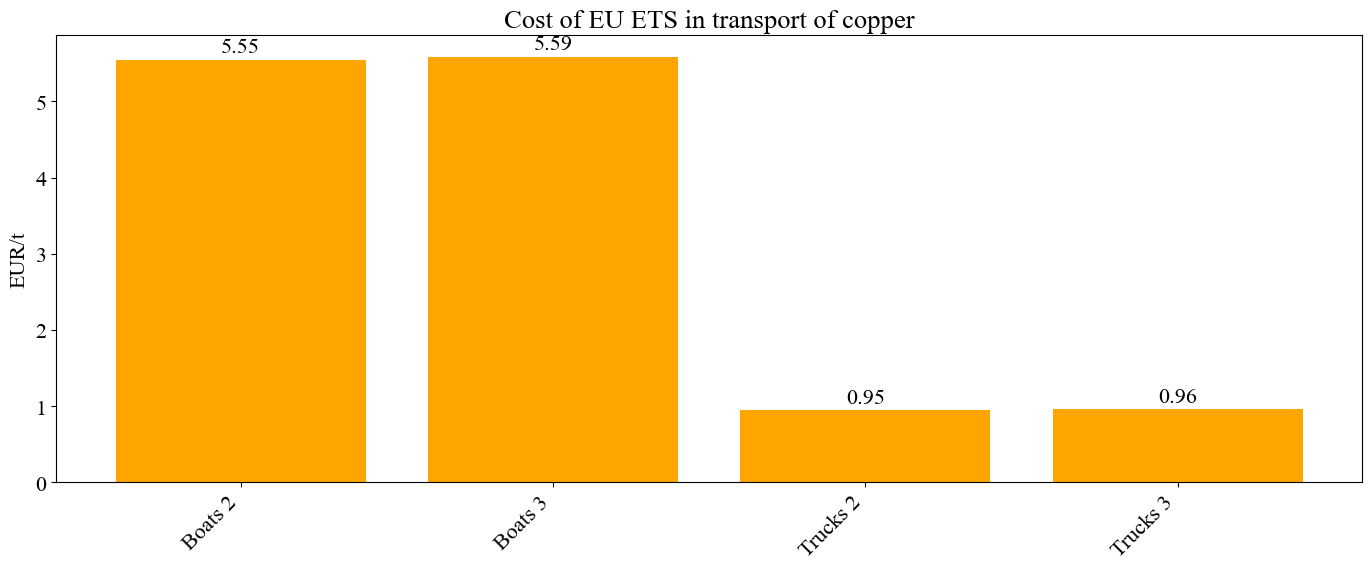

In [93]:
Cost_boats_2_mining_sum=Cost_boats_2_mining.sum(axis=0)
Cost_boats_3_mining_sum=Cost_boats_3_mining.sum(axis=0)
Cost_trucks_2_mining_sum=Cost_trucks_2_mining.sum(axis=0)
Cost_trucks_3_mining_sum=Cost_trucks_3_mining.sum(axis=0)
Cost_boats_2_metal_sum=Cost_boats_2_metal.sum(axis=0)
Cost_boats_3_metal_sum=Cost_boats_3_metal.sum(axis=0)
Cost_trucks_2_metal_sum=Cost_trucks_2_metal.sum(axis=0)
Cost_trucks_3_metal_sum=Cost_trucks_3_metal.sum(axis=0) 
space=0

chain=int(chain)

transport_mining=[Cost_boats_2_mining_sum.iloc[chain], Cost_boats_3_mining_sum.iloc[chain], Cost_trucks_2_mining_sum.iloc[chain], Cost_trucks_3_mining_sum.iloc[chain]]
transport_metal=[Cost_boats_2_metal_sum.iloc[chain], Cost_boats_3_metal_sum.iloc[chain], Cost_trucks_2_metal_sum.iloc[chain], Cost_trucks_3_metal_sum.iloc[chain]]

total_sum=[mining + metal for mining, metal in zip(transport_mining, transport_metal)]
labels=['Boats 2', 'Boats 3', 'Trucks 2', 'Trucks 3']

fig, ax = plt.subplots(figsize=(14, 6))
bars1=ax.bar(labels, transport_mining, label='Mining', color='blue')
bars2=ax.bar(labels, transport_metal, bottom=transport_mining, label='Metallurgy', color='orange')

for i, total in enumerate(total_sum):
    ax.text(i, total+0.005*max(total_sum), str(round(total, 2)), ha='center', va='bottom', color='black')

plt.ylabel('EUR/t')
plt.title('Cost of EU ETS in transport of copper')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas 45 grados
plt.tight_layout()           
plt.show()

Other cost: electricity

In [91]:
electricity=["Electricity by coal", "Electricity by gas", "Electricity by nuclear", "Electricity by hydro", "Electricity by wind", "Electricity by petroleum and other oil derivatives", "Electricity by biomass and waste", "Electricity by solar photovoltaic", "Electricity by solar thermal", "Electricity by tide, wave, ocean", "Electricity by Geothermal", "Electricity nec"]
for i in electricity: 
    print(i)

Electricity by coal
Electricity by gas
Electricity by nuclear
Electricity by hydro
Electricity by wind
Electricity by petroleum and other oil derivatives
Electricity by biomass and waste
Electricity by solar photovoltaic
Electricity by solar thermal
Electricity by tide, wave, ocean
Electricity by Geothermal
Electricity nec


In [ ]:
M_eq_electricity=pd.DataFrame()
electricity=["Electricity by coal", "Electricity by gas", "Electricity by nuclear", "Electricity by hydro", "Electricity by wind", "Electricity by petroleum and other oil derivatives", "Electricity by biomass and waste", "Electricity by solar photovoltaic", "Electricity by solar thermal", "Electricity by tide, wave, ocean", "Electricity by Geothermal", "Electricity nec"]

for j in range(12):
    M_eq_electricity_j=pd.DataFrame()
    M_eq_electricity_i=pd.DataFrame()
    for i in electricity: 
        M_eq_electricity_ij=climate_change_metal[j].xs(i, level="sector", axis=0)
        M_eq_electricity_ij=M_eq_electricity_ij.iloc[:,0]
        M_eq_electricity_j=pd.concat([M_eq_electricity_j,M_eq_electricity_ij], axis=1)
    
    M_eq_electricity_i=M_eq_electricity_j.sum(axis=1)
    M_eq_electricity=pd.concat([M_eq_electricity, M_eq_electricity_i], axis=1)

M_eq_electricity.columns=countries_list

In [1]:
countries_list_3=[countries_list,countries_list, countries_list]

NameError: name 'countries_list' is not defined

In [ ]:
Cost_electricity=pd.DataFrame()
for k in range(3):
    price_co2=price_co2_v[k]
    for j in range(12):
        Cost_electricity_i=[]
        
        for i, region in M_eq_electricity[j].items():
            if i in eu_countries: 
                Electricity_2=M_eq_electricity.loc[i,j]*price_co2      
            else:
                Electricity_2=0

            Cost_electricity_i.append(float(Electricity_2))

        Cost_electricity_i=pd.DataFrame(Cost_electricity_i)

        Cost_electricity=pd.concat([Cost_electricity, Cost_electricity_i], axis=1)
Cost_electricity.index=M_eq_electricity.index
Cost_electricity.columns=countries_list_3

In [95]:
Cost_electricity_sum=Cost_electricity.sum(axis=0)

Other cost: direct emissions

In [ ]:
M_eq_direct=pd.DataFrame()
for j in range(12):
    M_eq_direct_i=climate_change_metal[j].xs("Copper products", level="sector", axis=0)
    M_eq_direct_i=M_eq_direct_i.iloc[:,0]
    M_eq_direct=pd.concat([M_eq_direct, M_eq_direct_i], axis=1)
M_eq_direct.columns=countries_list_3

In [97]:
M_eq_direct.shape

(48, 12)

In [ ]:
Cost_direct=pd.DataFrame()
countries=[country_metal_1, country_metal_2, country_metal_3, country_metal_4, country_metal_1, country_metal_2, country_metal_3, country_metal_4, country_metal_1, country_metal_2, country_metal_3, country_metal_4]
for k in range(3):
    price_co2=price_co2_v[k]
    for j in range(12):
        Cost_direct_i=[]
        
        if countries[j] in eu_countries:
            Direct_2=M_eq_direct.loc[countries[j],j]*price_co2  
        else:
            Direct_2=0

        Cost_direct_i.append(float(Direct_2))

        Cost_direct_i=pd.DataFrame(Cost_direct_i)

        Cost_direct=pd.concat([Cost_direct, Cost_direct_i], axis=1)

Cost_direct.columns=countries_list_3

In [99]:
Cost_direct_sum=Cost_direct.sum(axis=0)

In [100]:
co2=impact_mining_111['Carbon dioxide, fossil', 'tonnes', 'air'].groupby(level='region').sum()
# Suma de columnas de países de la UE
eu_sum = co2[eu_countries].sum(axis=0)
non_eu_sum = co2[non_eu_countries].sum(axis=0)

In [101]:
print(eu_sum)
print(non_eu_sum)

0.0013142909586250176
0.14206137675307243


## Together

Heatmap

Text(0.5, 1.0, 'Cost of EU ETS of copper production (EUR/t)')

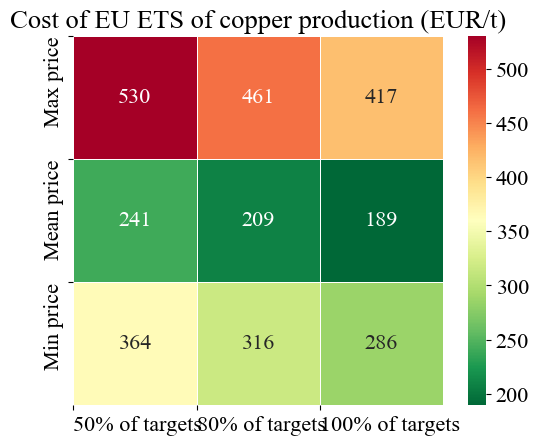

In [ ]:
Cost_total=Cost_boats_3_mining_sum+Cost_trucks_2_mining_sum+Cost_boats_3_metal_sum+Cost_trucks_2_metal_sum+Cost_planes_2_metal_sum+Cost_direct_sum+Cost_electricity_sum

## Spain
x_values_ES=np.array([0.42,0.66,0.81])
y_min_ES=np.array([Cost_total.iloc[12+2,0],Cost_total.iloc[24+2,0],Cost_total.iloc[2,0]])
y_mean_ES=np.array([Cost_total.iloc[12+6,0],Cost_total.iloc[24+6,0],Cost_total.iloc[6,0]])
y_max_ES=np.array([Cost_total.iloc[12+10,0],Cost_total.iloc[24+10,0],Cost_total.iloc[10,0]])

plt.figure(figsize=(6,4))
plt.fill_between(x_values_ES, y_min_ES, y_max_ES, color='skyblue', alpha=0.4)
plt.plot(x_values_ES, y_mean_ES, color='blue', linewidth=2, label='Media')

plt.xlabel('Porcentaje (%)')
plt.ylabel('Precio')
plt.legend()
plt.title('Cost of EU ETS of copper production (EUR/t)')

In [128]:
Cost_total

,0
0,3.685049
1,154.392487
2,145.457742
3,189.362607
4,5.013758
5,167.171454
6,168.173485
7,241.055750
8,4.061655
9,142.152279


In [108]:
Cost_total

,0
0,3.685049
1,154.392487
2,145.457742
3,189.362607
4,5.013758
5,167.171454
6,168.173485
7,241.055750
8,4.061655
9,142.152279


Carbon Border Adjustment Mechanism

In [ ]:
em_direct_CN_2030=M_eq_direct.iloc[:,8].sum()
em_direct_DE_2030=M_eq_direct.iloc[:,9].sum()
em_direct_ES_2030=M_eq_direct.iloc[:,10].sum()
em_direct_PL_2030=M_eq_direct.iloc[:,11].sum()

em_electricity_CN_2030=M_eq_electricity.iloc[:,8].sum()
em_electricity_DE_2030=M_eq_electricity.iloc[:,9].sum()
em_electricity_ES_2030=M_eq_electricity.iloc[:,10].sum()
em_electricity_PL_2030=M_eq_electricity.iloc[:,11].sum()

Cost_CBAM_CN=price_co2_2030*(em_direct_CN_2030+em_electricity_CN_2030)-Cost_CN_2030_direct-Cost_CN_2030_electricity
Cost_CBAM_DE=price_co2_2030*(em_direct_DE_2030+em_electricity_DE_2030)-Cost_DE_2030_direct-Cost_DE_2030_electricity
Cost_CBAM_ES=price_co2_2030*(em_direct_ES_2030+em_electricity_ES_2030)-Cost_ES_2030_direct-Cost_ES_2030_electricity
Cost_CBAM_PL=price_co2_2030*(em_direct_PL_2030+em_electricity_PL_2030)-Cost_PL_2030_direct-Cost_PL_2030_electricity

Cost_CBAM=[0,0,0,0,space,0,0,0,0,space,Cost_CBAM_CN, Cost_CBAM_DE, Cost_CBAM_ES, Cost_CBAM_PL]

In [ ]:
Cost_CBAM_CN_min=price_co2_2030_min*(em_direct_CN_2030+em_electricity_CN_2030)-Cost_CN_2030_direct_min-Cost_CN_2030_electricity_min
Cost_CBAM_DE_min=price_co2_2030_min*(em_direct_DE_2030+em_electricity_DE_2030)-Cost_DE_2030_direct_min-Cost_DE_2030_electricity_min
Cost_CBAM_ES_min=price_co2_2030_min*(em_direct_ES_2030+em_electricity_ES_2030)-Cost_ES_2030_direct_min-Cost_ES_2030_electricity_min
Cost_CBAM_PL_min=price_co2_2030_min*(em_direct_PL_2030+em_electricity_PL_2030)-Cost_PL_2030_direct_min-Cost_PL_2030_electricity_min

Cost_CBAM_CN_max=price_co2_2030_max*(em_direct_CN_2030+em_electricity_CN_2030)-Cost_CN_2030_direct_max-Cost_CN_2030_electricity_max
Cost_CBAM_DE_max=price_co2_2030_max*(em_direct_DE_2030+em_electricity_DE_2030)-Cost_DE_2030_direct_max-Cost_DE_2030_electricity_max
Cost_CBAM_ES_max=price_co2_2030_max*(em_direct_ES_2030+em_electricity_ES_2030)-Cost_ES_2030_direct_max-Cost_ES_2030_electricity_max
Cost_CBAM_PL_max=price_co2_2030_max*(em_direct_PL_2030+em_electricity_PL_2030)-Cost_PL_2030_direct_max-Cost_PL_2030_electricity_max

mean_values=np.array([Cost_CN_2030_trans_mining + Cost_CN_2030_trans_metal + Cost_CN_2030_direct + Cost_CN_2030_electricity + Cost_CBAM_CN,
                    Cost_DE_2030_trans_mining + Cost_DE_2030_trans_metal + Cost_DE_2030_direct + Cost_DE_2030_electricity + Cost_CBAM_DE, 
                    Cost_ES_2030_trans_mining + Cost_ES_2030_trans_metal + Cost_ES_2030_direct + Cost_ES_2030_electricity + Cost_CBAM_ES,
                    Cost_PL_2030_trans_mining + Cost_PL_2030_trans_metal + Cost_PL_2030_direct + Cost_PL_2030_electricity + Cost_CBAM_PL])

min_values=np.array([Cost_CN_2030_trans_mining_min+Cost_CN_2030_trans_metal_min+Cost_CN_2030_direct_min+Cost_CN_2030_electricity_min + Cost_CBAM_CN_min,
    Cost_DE_2030_trans_mining_min+Cost_DE_2030_trans_metal_min+Cost_DE_2030_direct_min+Cost_DE_2030_electricity_min + Cost_CBAM_DE_min,
    Cost_ES_2030_trans_mining_min+Cost_ES_2030_trans_metal_min+Cost_ES_2030_direct_min+Cost_ES_2030_electricity_min + Cost_CBAM_ES_min,
    Cost_PL_2030_trans_mining_min+Cost_PL_2030_trans_metal_min+Cost_PL_2030_direct_min+Cost_PL_2030_electricity_min + Cost_CBAM_PL_min])

max_values=np.array([Cost_CN_2030_trans_mining_max+Cost_CN_2030_trans_metal_max+Cost_CN_2030_direct_max+Cost_CN_2030_electricity_max + Cost_CBAM_CN_max,
    Cost_DE_2030_trans_mining_max+Cost_DE_2030_trans_metal_max+Cost_DE_2030_direct_max+Cost_DE_2030_electricity_max + Cost_CBAM_DE_max,
    Cost_ES_2030_trans_mining_max+Cost_ES_2030_trans_metal_max+Cost_ES_2030_direct_max+Cost_ES_2030_electricity_max + Cost_CBAM_ES_max,
    Cost_PL_2030_trans_mining_max+Cost_PL_2030_trans_metal_max+Cost_PL_2030_direct_max+Cost_PL_2030_electricity_max + Cost_CBAM_PL_max])

error_min=mean_values-min_values
error_max=max_values-mean_values

errors=np.array([error_min, error_max])

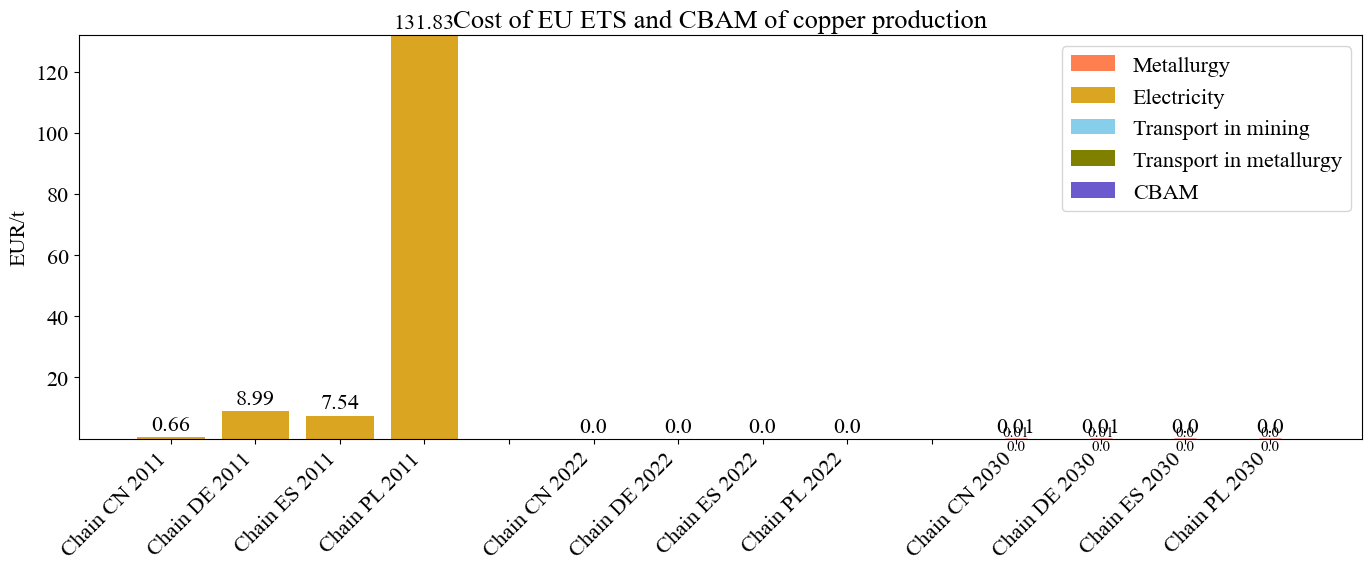

In [ ]:
total_sum=[electricity + direct + mining + metal + cbam for electricity, direct, mining, metal, cbam in zip(Cost_electricity, Cost_direct, Cost_trans_mining, Cost_trans_metal, Cost_CBAM)]
labels=['Chain CN 2011', 'Chain DE 2011', 'Chain ES 2011','Chain PL 2011', '','Chain CN 2022', 'Chain DE 2022', 'Chain ES 2022','Chain PL 2022', ' ', 'Chain CN 2030', 'Chain DE 2030', 'Chain ES 2030','Chain PL 2030']

fig, ax = plt.subplots(figsize=(14, 6))
bars1=ax.bar(labels, Cost_direct , label='Metallurgy', color='coral')
bars2=ax.bar(labels, Cost_electricity, bottom=Cost_direct, label='Electricity', color='goldenrod')
bars3=ax.bar(labels, Cost_trans_mining, bottom=np.array(Cost_electricity)+np.array(Cost_direct), label='Transport in mining', color='skyblue')
bars4=ax.bar(labels, Cost_trans_metal, bottom=np.array(Cost_electricity)+np.array(Cost_direct)+np.array(Cost_trans_mining), label='Transport in metallurgy', color='olive')
bar5=ax.bar(labels, Cost_CBAM, bottom=np.array(Cost_electricity)+np.array(Cost_direct)+np.array(Cost_trans_mining)+np.array(Cost_trans_metal), label='CBAM', color='slateblue')

x=np.array([10,11,12,13]) #bars with sensitivity
x1=np.array([10,11,12,13]) #bars with sensitivity
y=mean_values  
ax.errorbar(x[:], y[:], 
    yerr=errors[:, :],  
    fmt='none', ecolor='red', elinewidth=1, capsize=8, capthick=1)

for i, total in enumerate(total_sum):
    if total != 0:
        ax.text(i, total+0.005*max(total_sum), str(round(total, 2)), ha='center', va='bottom', color='black')   
for i, pos in enumerate(x1):
    ax.text(pos, min_values[i], str(round(min_values[i],2)), ha='center', va='top', color='black', fontsize=11)
    ax.text(pos, max_values[i], str(round(max_values[i],2)), ha='center', va='bottom', color='black', fontsize=11)

ax.legend()
plt.ylabel('EUR/t')
plt.title('Cost of EU ETS and CBAM of copper production')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas 45 grados
plt.tight_layout()           
plt.show()